In [63]:
import pygetwindow as gw
from PIL import ImageGrab
import psutil
import os
import time
import threading
import cv2
import numpy as np
import keyboard
import pygetwindow as gw
import mss
import ctypes
import matplotlib.pyplot as plt
import pyautogui
from pynput.keyboard import Key, Controller
from directkeys import *

UP = 0xC8
LEFT = 0xCB
RIGHT = 0xCD
DOWN = 0xD0
TWO = 0x2
THREE = 0x3

In [100]:
def get_process_id_by_name(process_name):
    for process in psutil.process_iter(['pid', 'name']):
        if process.info['name'] == process_name:
            return process.info['pid']
    return None

def get_active_window_process_id():
    active_window = ctypes.windll.user32.GetForegroundWindow()
    process_id = ctypes.c_ulong(0)
    ctypes.windll.user32.GetWindowThreadProcessId(active_window, ctypes.byref(process_id))
    return process_id.value

def preprocess_image_with_canny(image):
    screenshot_np = np.array(image)

    processed_img = cv2.cvtColor(screenshot_np, cv2.COLOR_RGB2GRAY)
    processed_img = cv2.Canny(processed_img, threshold1=200, threshold2=300)

    return processed_img

def crop_image(np_image):
    height, width = np_image.shape
    x, y = 0, int(height / 3)

    cropped_image = np_image[y:y+height, x:x+width]

    return cropped_image

def delete_short_lines(np_image, min_length):
    canny_image = cv2.Canny(np_image, threshold1=100, threshold2=200)

    # Визначимо розмір ядра для діляції
    kernel_size = 3
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Застосуємо діляцію для збільшення розміру ліній
    thick_lines_image = cv2.dilate(canny_image, kernel, iterations=1)

    # Показати зображення з товстими лініями
    # plt.imshow(cv2.cvtColor(thick_lines_image, cv2.COLOR_BGR2RGB))
    # plt.show()

    contours, _ = cv2.findContours(thick_lines_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Видалення ліній, які коротші за min_length пікселів
    filtered_image = thick_lines_image.copy()

    for contour in contours:
        if cv2.arcLength(contour, True) < min_length:
            cv2.drawContours(filtered_image, [contour], -1, 0, -1)

    return filtered_image

def draw_black_bbox(np_image, x_min, y_min, x_max, y_max):
    for i in range(x_min, x_max):
        for j in range(y_min, y_max):
            np_image[i][j] = 0

def distance_to_first_white_pixel(np_image, start_point, dx, dy):
    x, y = start_point
    while 0 <= x < np_image.shape[1] and 0 <= y < np_image.shape[0]:
        if np_image[int(y), int(x)] == 255:
            break

        x += dy
        y += dx

    # Знайдена точка, де перший білий піксель перетинається з променем
    end_point = (int(x), int(y))
    # Знайдена відстань
    distance = np.sqrt((end_point[0] - start_point[0])**2 + (end_point[1] - start_point[1])**2)

    return end_point, distance

In [101]:
process_name = "Trackmania.exe"  # Назва процесу, для якого ви хочете отримати ідентифікатор
process_id = get_process_id_by_name(process_name)

keyboard = Controller()

while True:
    active_process_id = get_active_window_process_id()  

    if process_id == active_process_id:
        start_time = time.time()
        PressKey(UP)
        PressKey(TWO)

        print("match")

        printscreen =  ImageGrab.grab()
        
        processed_img = preprocess_image_with_canny(printscreen)

        cropped_image = crop_image(processed_img)

        filtered_image = delete_short_lines(cropped_image, 500)

        draw_black_bbox(filtered_image, 400, 1000, 954, 1550)

        start_point = (1280, 700)
        dx = -1
        max_distance = 0
        final_point = ()
        final_angle = ()

        # plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))

        for dy in range(-20, 21, 5):
            end_point, distance = distance_to_first_white_pixel(filtered_image, start_point, dx, dy / 50)
            x_end, y_end = end_point
            # plt.scatter(x_end, y_end, color='green', marker='o', s=20)

            if distance > max_distance:
                max_distance = distance
                final_point = end_point
                final_angle = (dx, dy)

        _, angle = final_angle

        x_start, y_start = start_point
        # plt.scatter(x_start, y_start, color='red', marker='o', s=50)

        # print(final_angle)
        if angle < 0:
            ReleaseKey(RIGHT)
            PressKey(LEFT)

        if angle > 0:
            ReleaseKey(LEFT)
            PressKey(RIGHT)

        # plt.show()
        end_time = time.time()
        print("execute time:", end_time - start_time)

match
execute time: 0.24700021743774414
match
execute time: 0.23800015449523926
match
execute time: 0.20799779891967773
match
execute time: 0.2250044345855713
match
execute time: 0.2129967212677002
match
execute time: 0.21200799942016602
match
execute time: 0.21799778938293457
match
execute time: 0.21151399612426758
match
execute time: 0.21000289916992188
match
execute time: 0.196000337600708
match
execute time: 0.20499968528747559
match
execute time: 0.20800542831420898
match
execute time: 0.20799469947814941
match
execute time: 0.2030041217803955
match
execute time: 0.21599578857421875
match
execute time: 0.21200180053710938
match
execute time: 0.21100425720214844
match
execute time: 0.2059931755065918
match
execute time: 0.2129993438720703
match
execute time: 0.20599937438964844
match
execute time: 0.20999956130981445
match
execute time: 0.2089998722076416
match
execute time: 0.2140038013458252
match
execute time: 0.21999812126159668
match
execute time: 0.2160031795501709
match
exec

KeyboardInterrupt: 

In [ ]:
def distance_to_first_white_pixel(np_image, start_point, dx, dy):
    x, y = start_point
    while 0 <= x < np_image.shape[1] and 0 <= y < np_image.shape[0]:
        if np_image[int(y), int(x)] == 255:
            break

        x += dy
        y += dx

    # Знайдена точка, де перший білий піксель перетинається з променем
    end_point = (int(x), int(y))
    # Знайдена відстань
    distance = np.sqrt((end_point[0] - start_point[0])**2 + (end_point[1] - start_point[1])**2)

    return end_point, distance

0.02299952507019043
0.0
0.01000213623046875
0.013010263442993164
(-1, -20)
end time: 0.2786827087402344


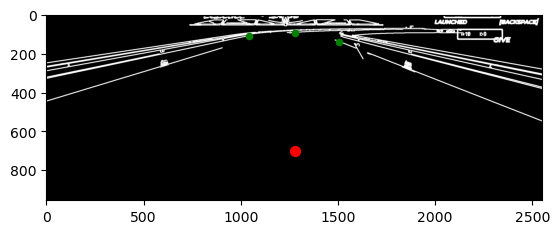

In [97]:
start_time = time.time()
printscreen = cv2.imread('./../data/trackmania-screenshots/example_of_view.png')

preprocess_image_with_canny_start = time.time()
processed_img = preprocess_image_with_canny(printscreen)
preprocess_image_with_canny_end = time.time()

print(preprocess_image_with_canny_end - preprocess_image_with_canny_start)

crop_image_start = time.time()
cropped_image = crop_image(processed_img)
crop_image_end = time.time()

print(crop_image_end - crop_image_start)

delete_short_lines_start = time.time()
filtered_image = delete_short_lines(cropped_image, 500)
delete_short_lines_end = time.time()

print(delete_short_lines_end - delete_short_lines_start)

draw_black_bbox(filtered_image, 400, 1000, 954, 1550)

start_point = (1280, 700)
dx = -1
max_distance = 0
final_point = ()
final_angle = ()

plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))

distance_to_first_white_pixel_start = time.time()
for dy in range(-20, 21, 20):
    end_point, distance = distance_to_first_white_pixel(filtered_image, start_point, dx, dy / 50)
    x_end, y_end = end_point
    plt.scatter(x_end, y_end, color='green', marker='o', s=20)

    if distance > max_distance:
        max_distance = distance
        final_point = end_point
        final_angle = (dx, dy)
distance_to_first_white_pixel_end = time.time()

print(distance_to_first_white_pixel_end - distance_to_first_white_pixel_start)

_, angle = final_angle

print(final_angle)

end_time = time.time()
print("end time:", end_time - start_time)

x_start, y_start = start_point
plt.scatter(x_start, y_start, color='red', marker='o', s=50)
plt.show()